*La Ode Muhammad Yudhy Prayitno*
_ *E1E122064*
<br>
**Information Retrieval Assignment_01**

# Incidence Matrix Verification


This notebook verifies the results of manual calculations using Python.
We will use NumPy to perform matrix operations and check if the programmatic
results match the manually computed ones.

## Python calculation

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
# Define the incidence matrix
columns = ["Antony & Cleopatra", "Julius Caesar", "The Tempest", "Hamlet", "Othello", "Macbeth"]
rows = ["Antony", "Brutus", "Caesar", "Calpurnia", "Cleopatra", "Mercy", "Worser"]

In [ ]:
matrix = np.array([
    [1, 1, 0, 0, 0, 1],  # Antony
    [1, 1, 0, 1, 0, 0],  # Brutus
    [1, 1, 0, 1, 1, 1],  # Caesar
    [0, 1, 0, 0, 0, 0],  # Calpurnia
    [1, 0, 0, 0, 0, 0],  # Cleopatra
    [1, 0, 1, 1, 1, 1],  # Mercy
    [1, 0, 1, 1, 1, 0],  # Worser
])

In [ ]:
df = pd.DataFrame(matrix, index=rows, columns=columns)
print("Incidence Matrix:")
display(df)

Incidence Matrix:


,Antony & Cleopatra,Julius Caesar,The Tempest,Hamlet,Othello,Macbeth
Antony,1,1,0,0,0,1
Brutus,1,1,0,1,0,0
Caesar,1,1,0,1,1,1
Calpurnia,0,1,0,0,0,0
Cleopatra,1,0,0,0,0,0
Mercy,1,0,1,1,1,1
Worser,1,0,1,1,1,0


In [ ]:
# Define the logical operations for the task
calpurnia_or = matrix[3]  # Row for Calpurnia
cleopatra_and_worser = np.logical_and(matrix[4], matrix[6])

In [ ]:
# Compute the final result using logical OR operation
result = np.logical_or(calpurnia_or, cleopatra_and_worser)

In [ ]:
# Convert boolean results to integers (1 or 0)
final_result = result.astype(int)

In [ ]:
# Display the result
result_df = pd.DataFrame([final_result], columns=columns, index=["Result"])
print("Final Python calculation Result:")
display(result_df)

Final Python calculation Result:


,Antony & Cleopatra,Julius Caesar,The Tempest,Hamlet,Othello,Macbeth
Result,1,1,0,0,0,0


## The handwritten solution

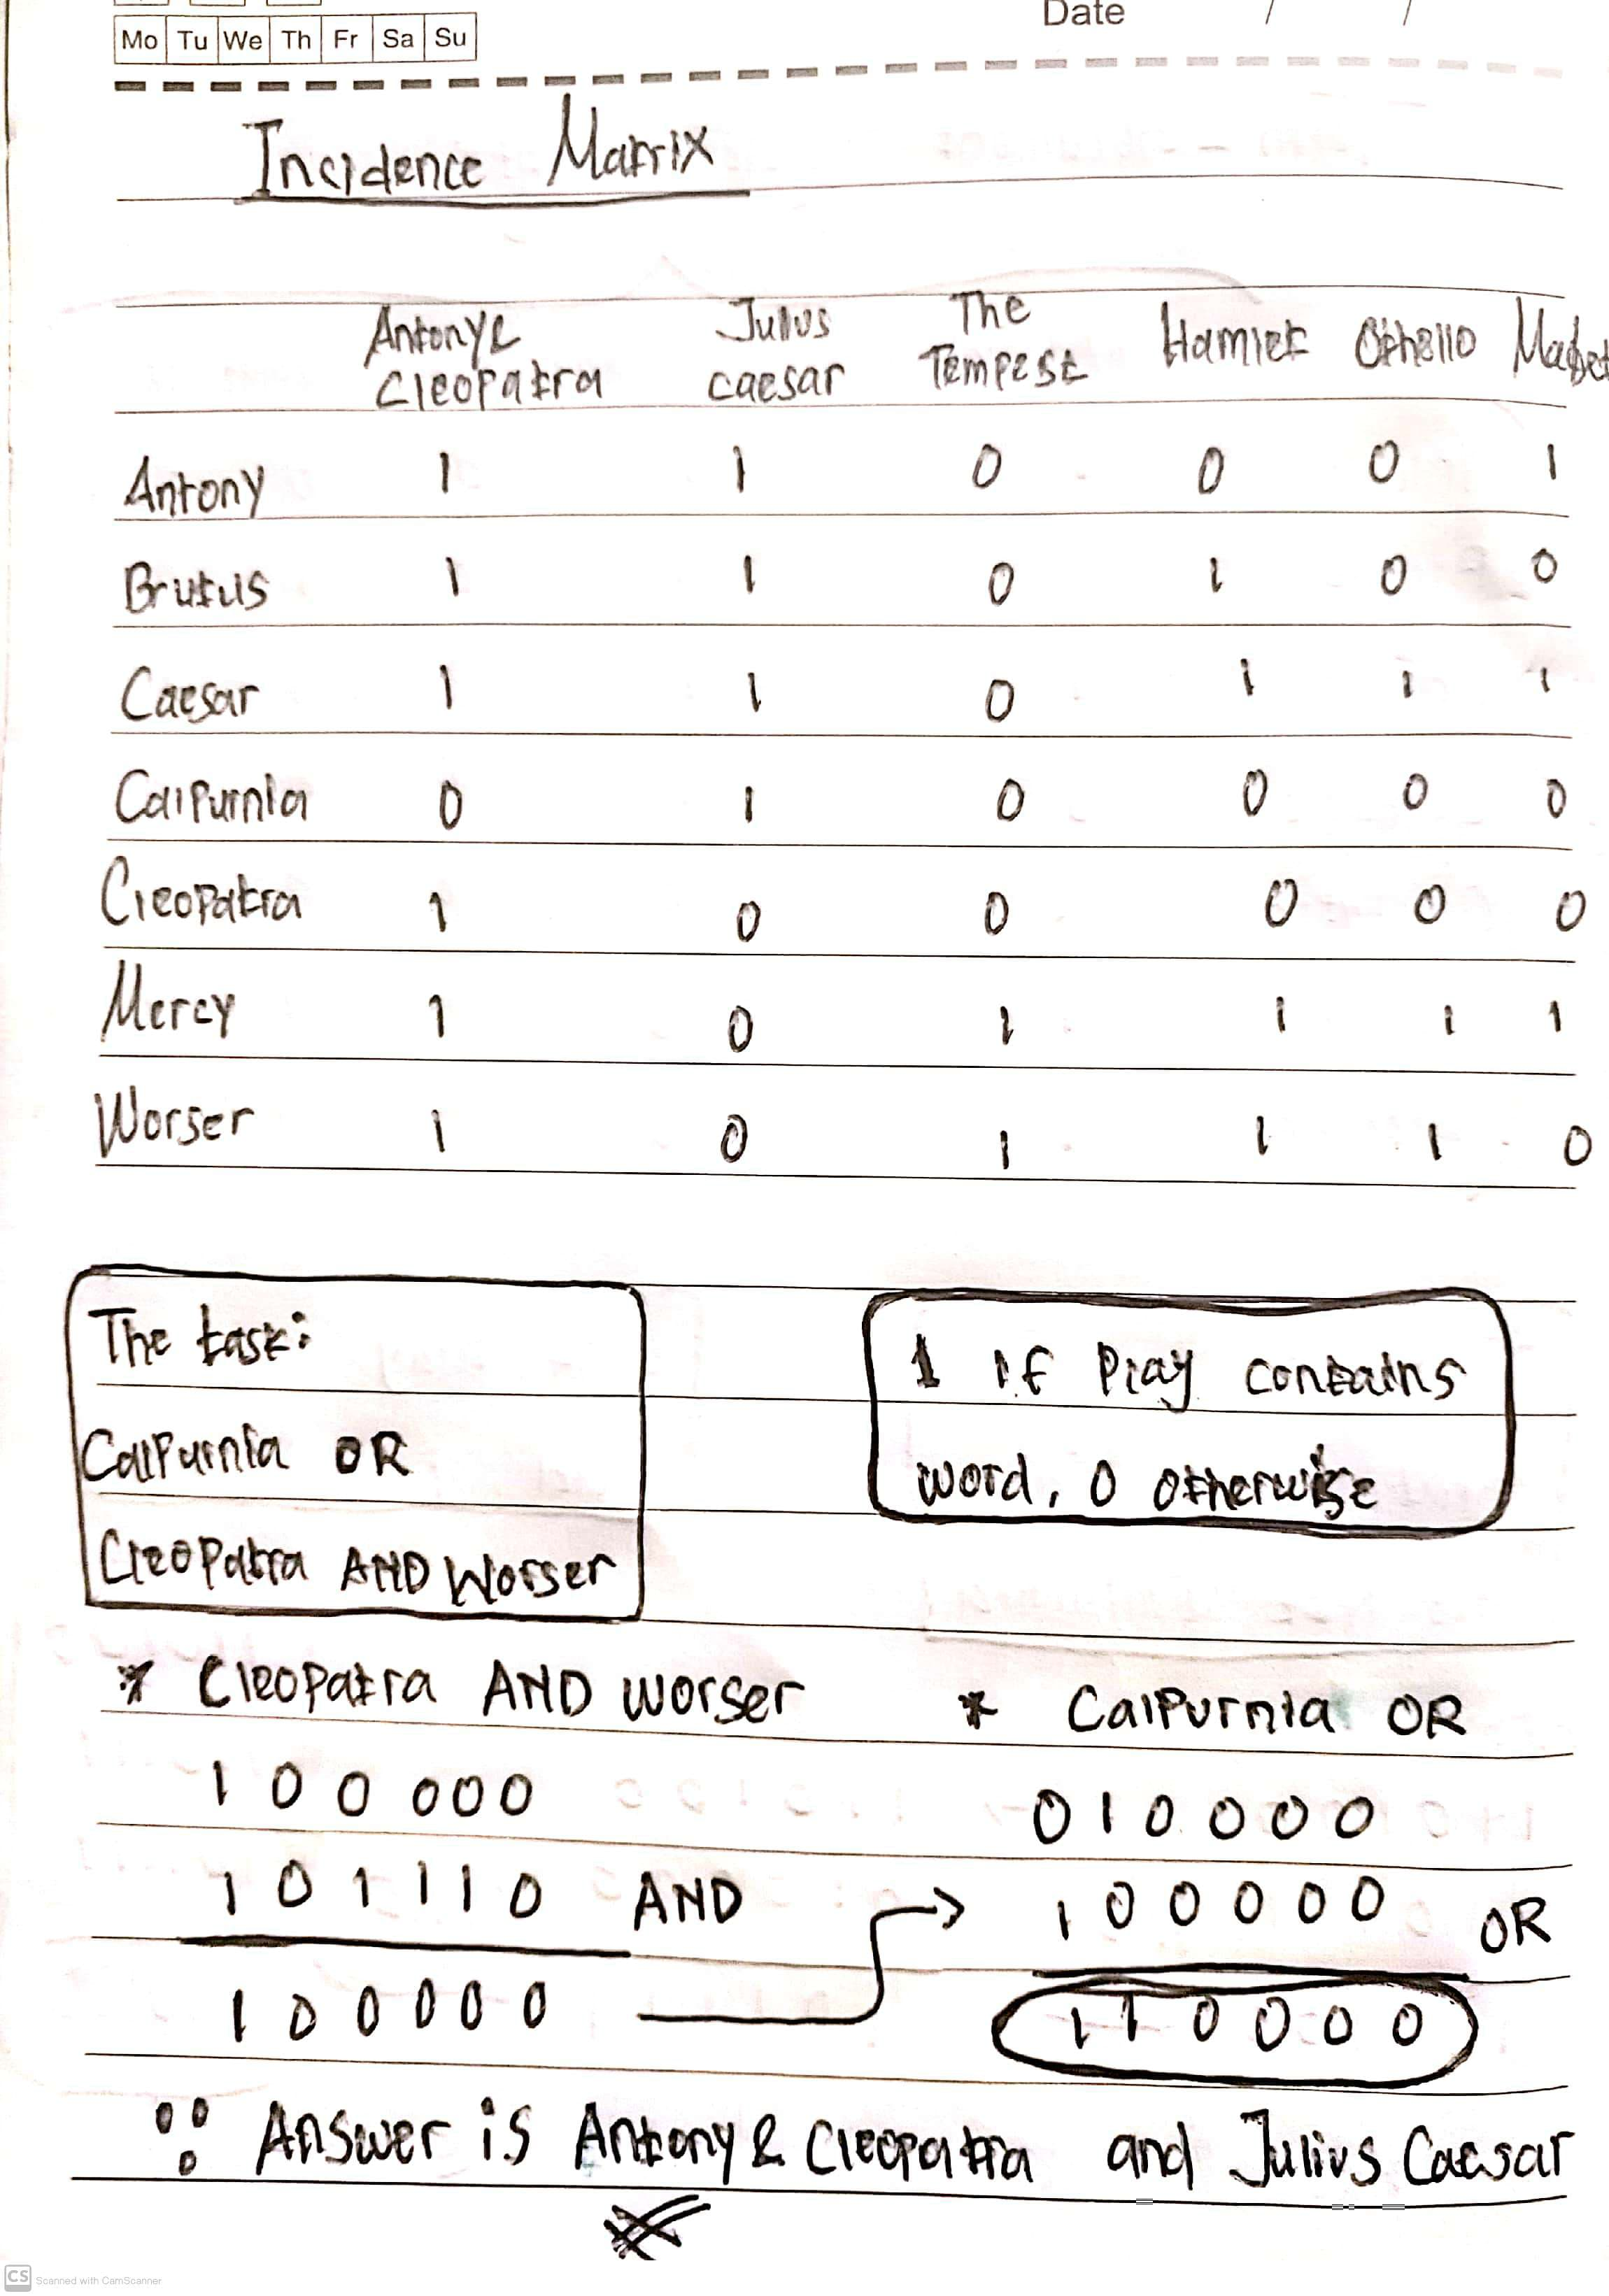

##  Verify with manual calculation

In [ ]:
manual_result = np.array([1, 1, 0, 0, 0, 0])
assert np.array_equal(final_result, manual_result), "Mismatch found!"
print("✅ The programmatic result matches the manual calculation!")

✅ The programmatic result matches the manual calculation!


# Inverted Index Implementation

This notebook demonstrates the construction of a complex inverted index using Python.
It includes:
- Data declaration for terms and their document positions.
- Automatic index construction.
- Validation to compare manual and computed results.

## The handwritten solution

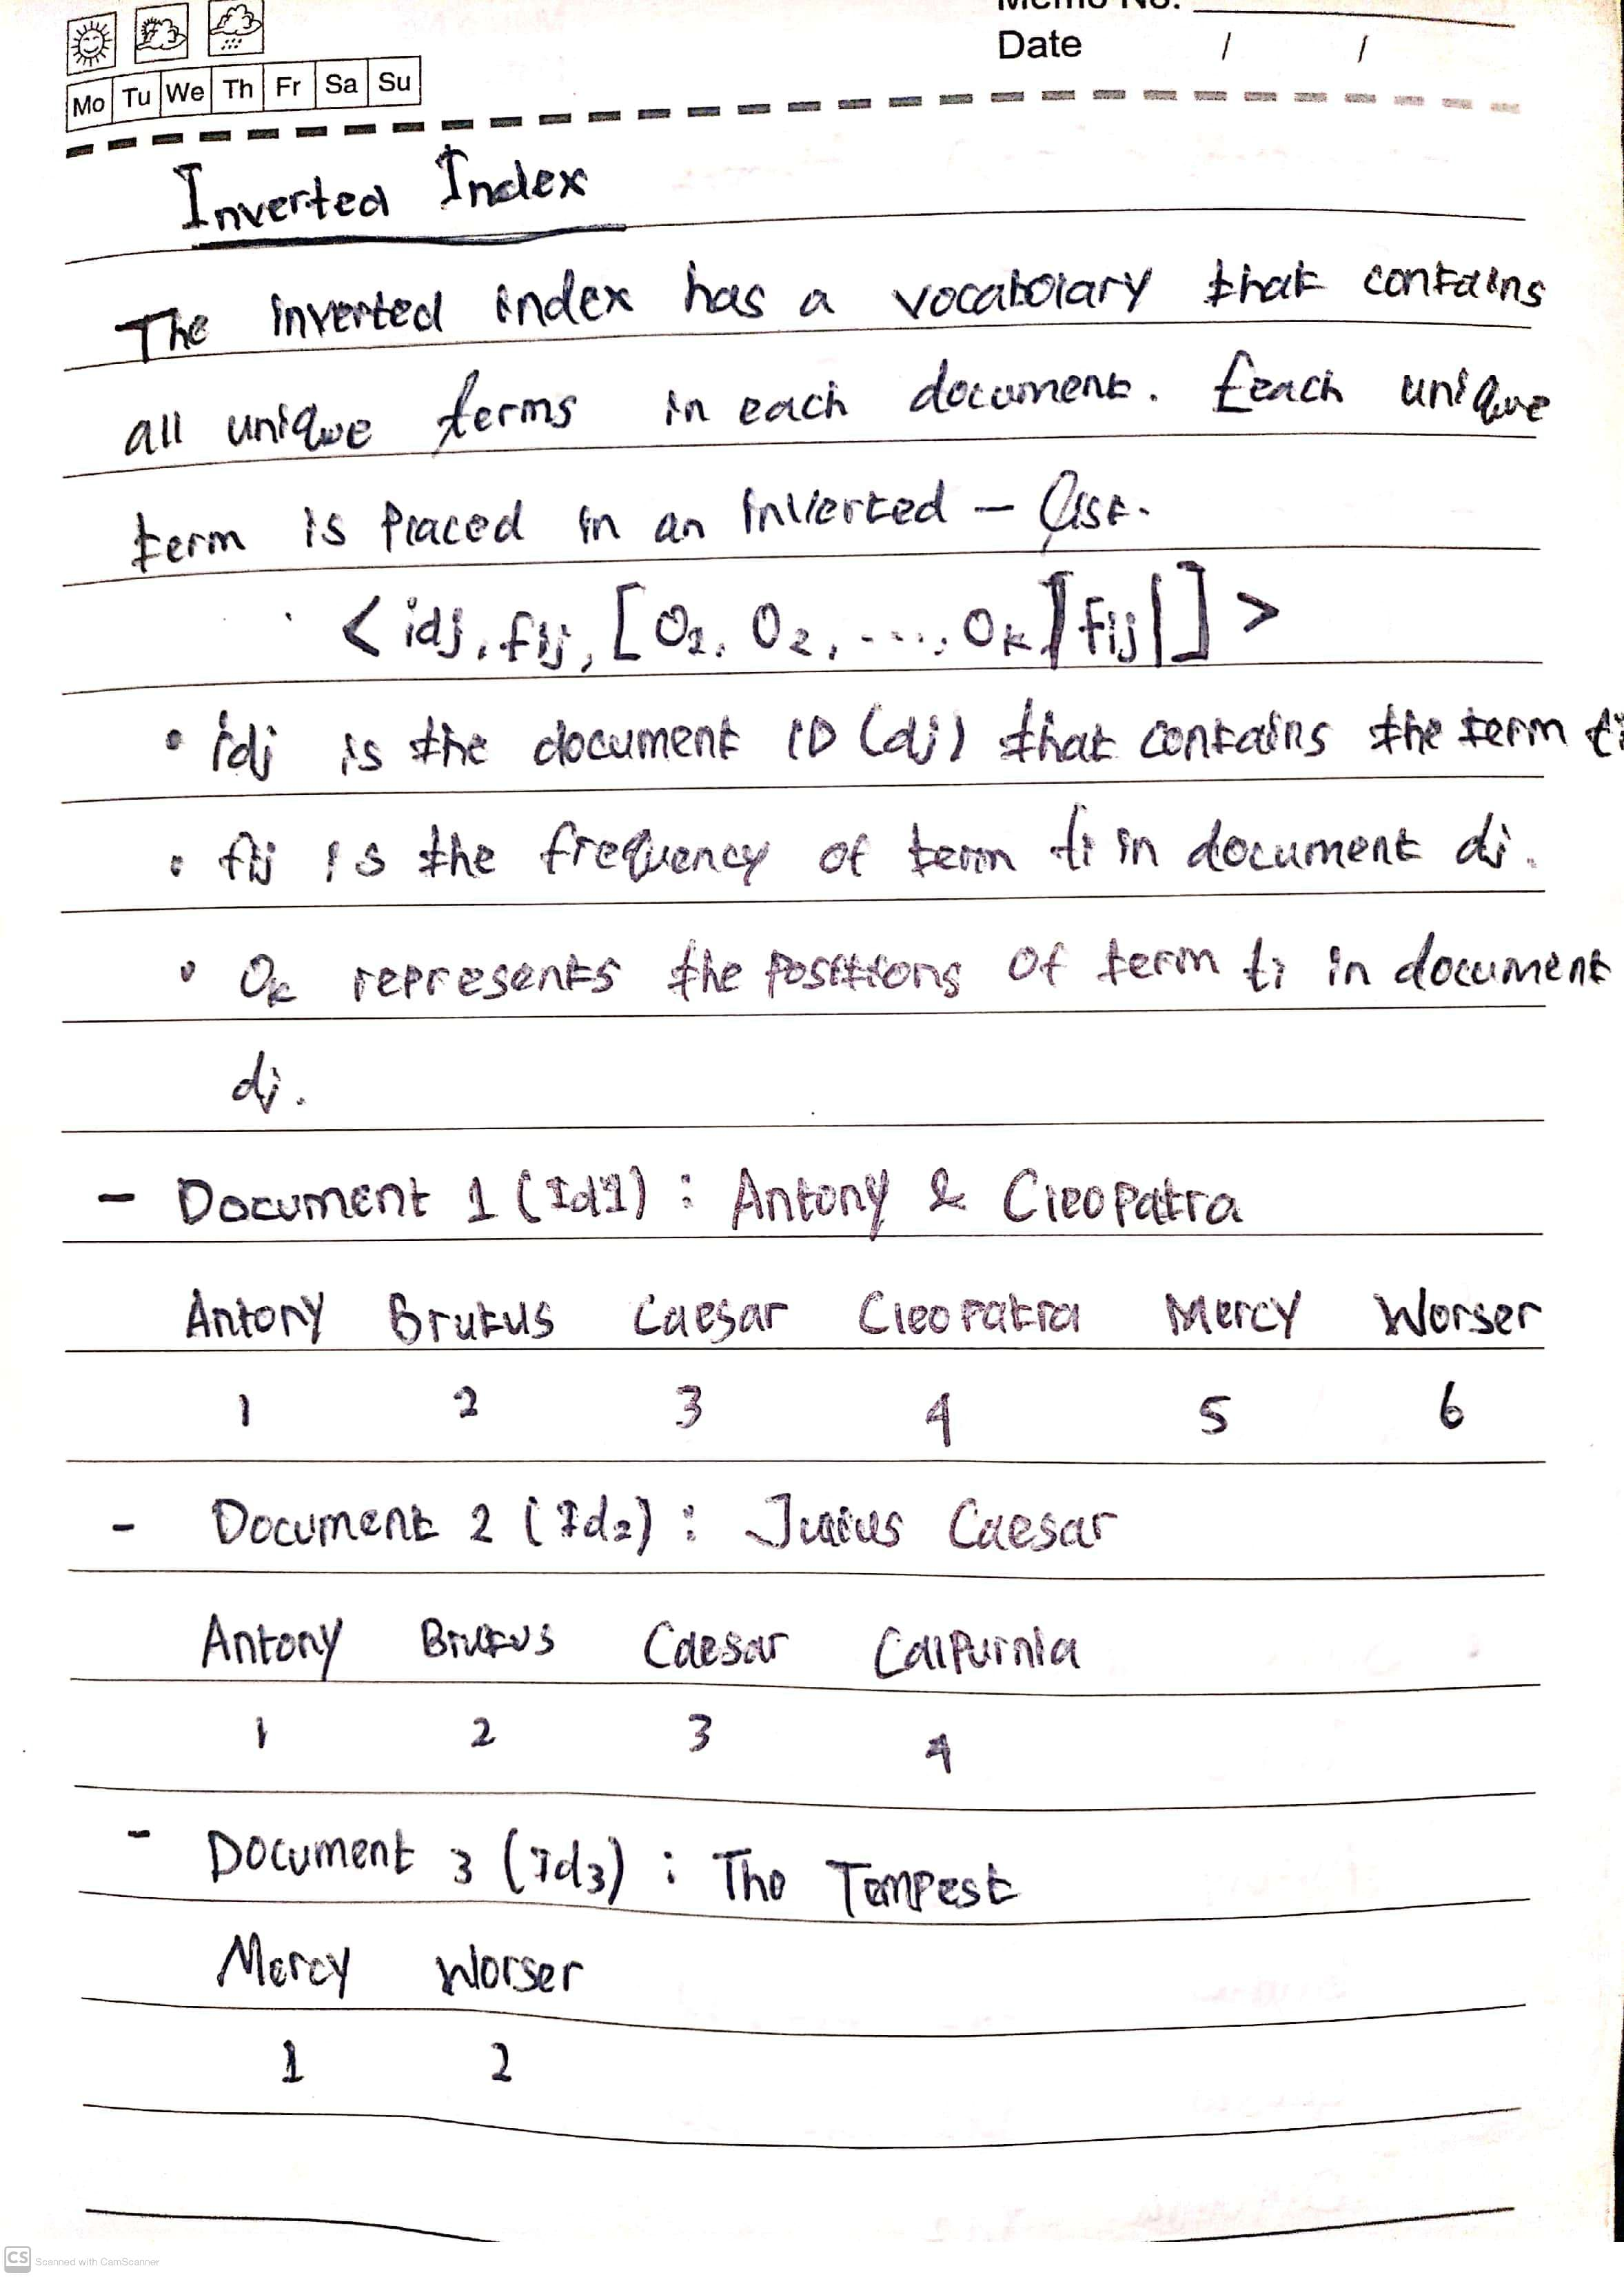

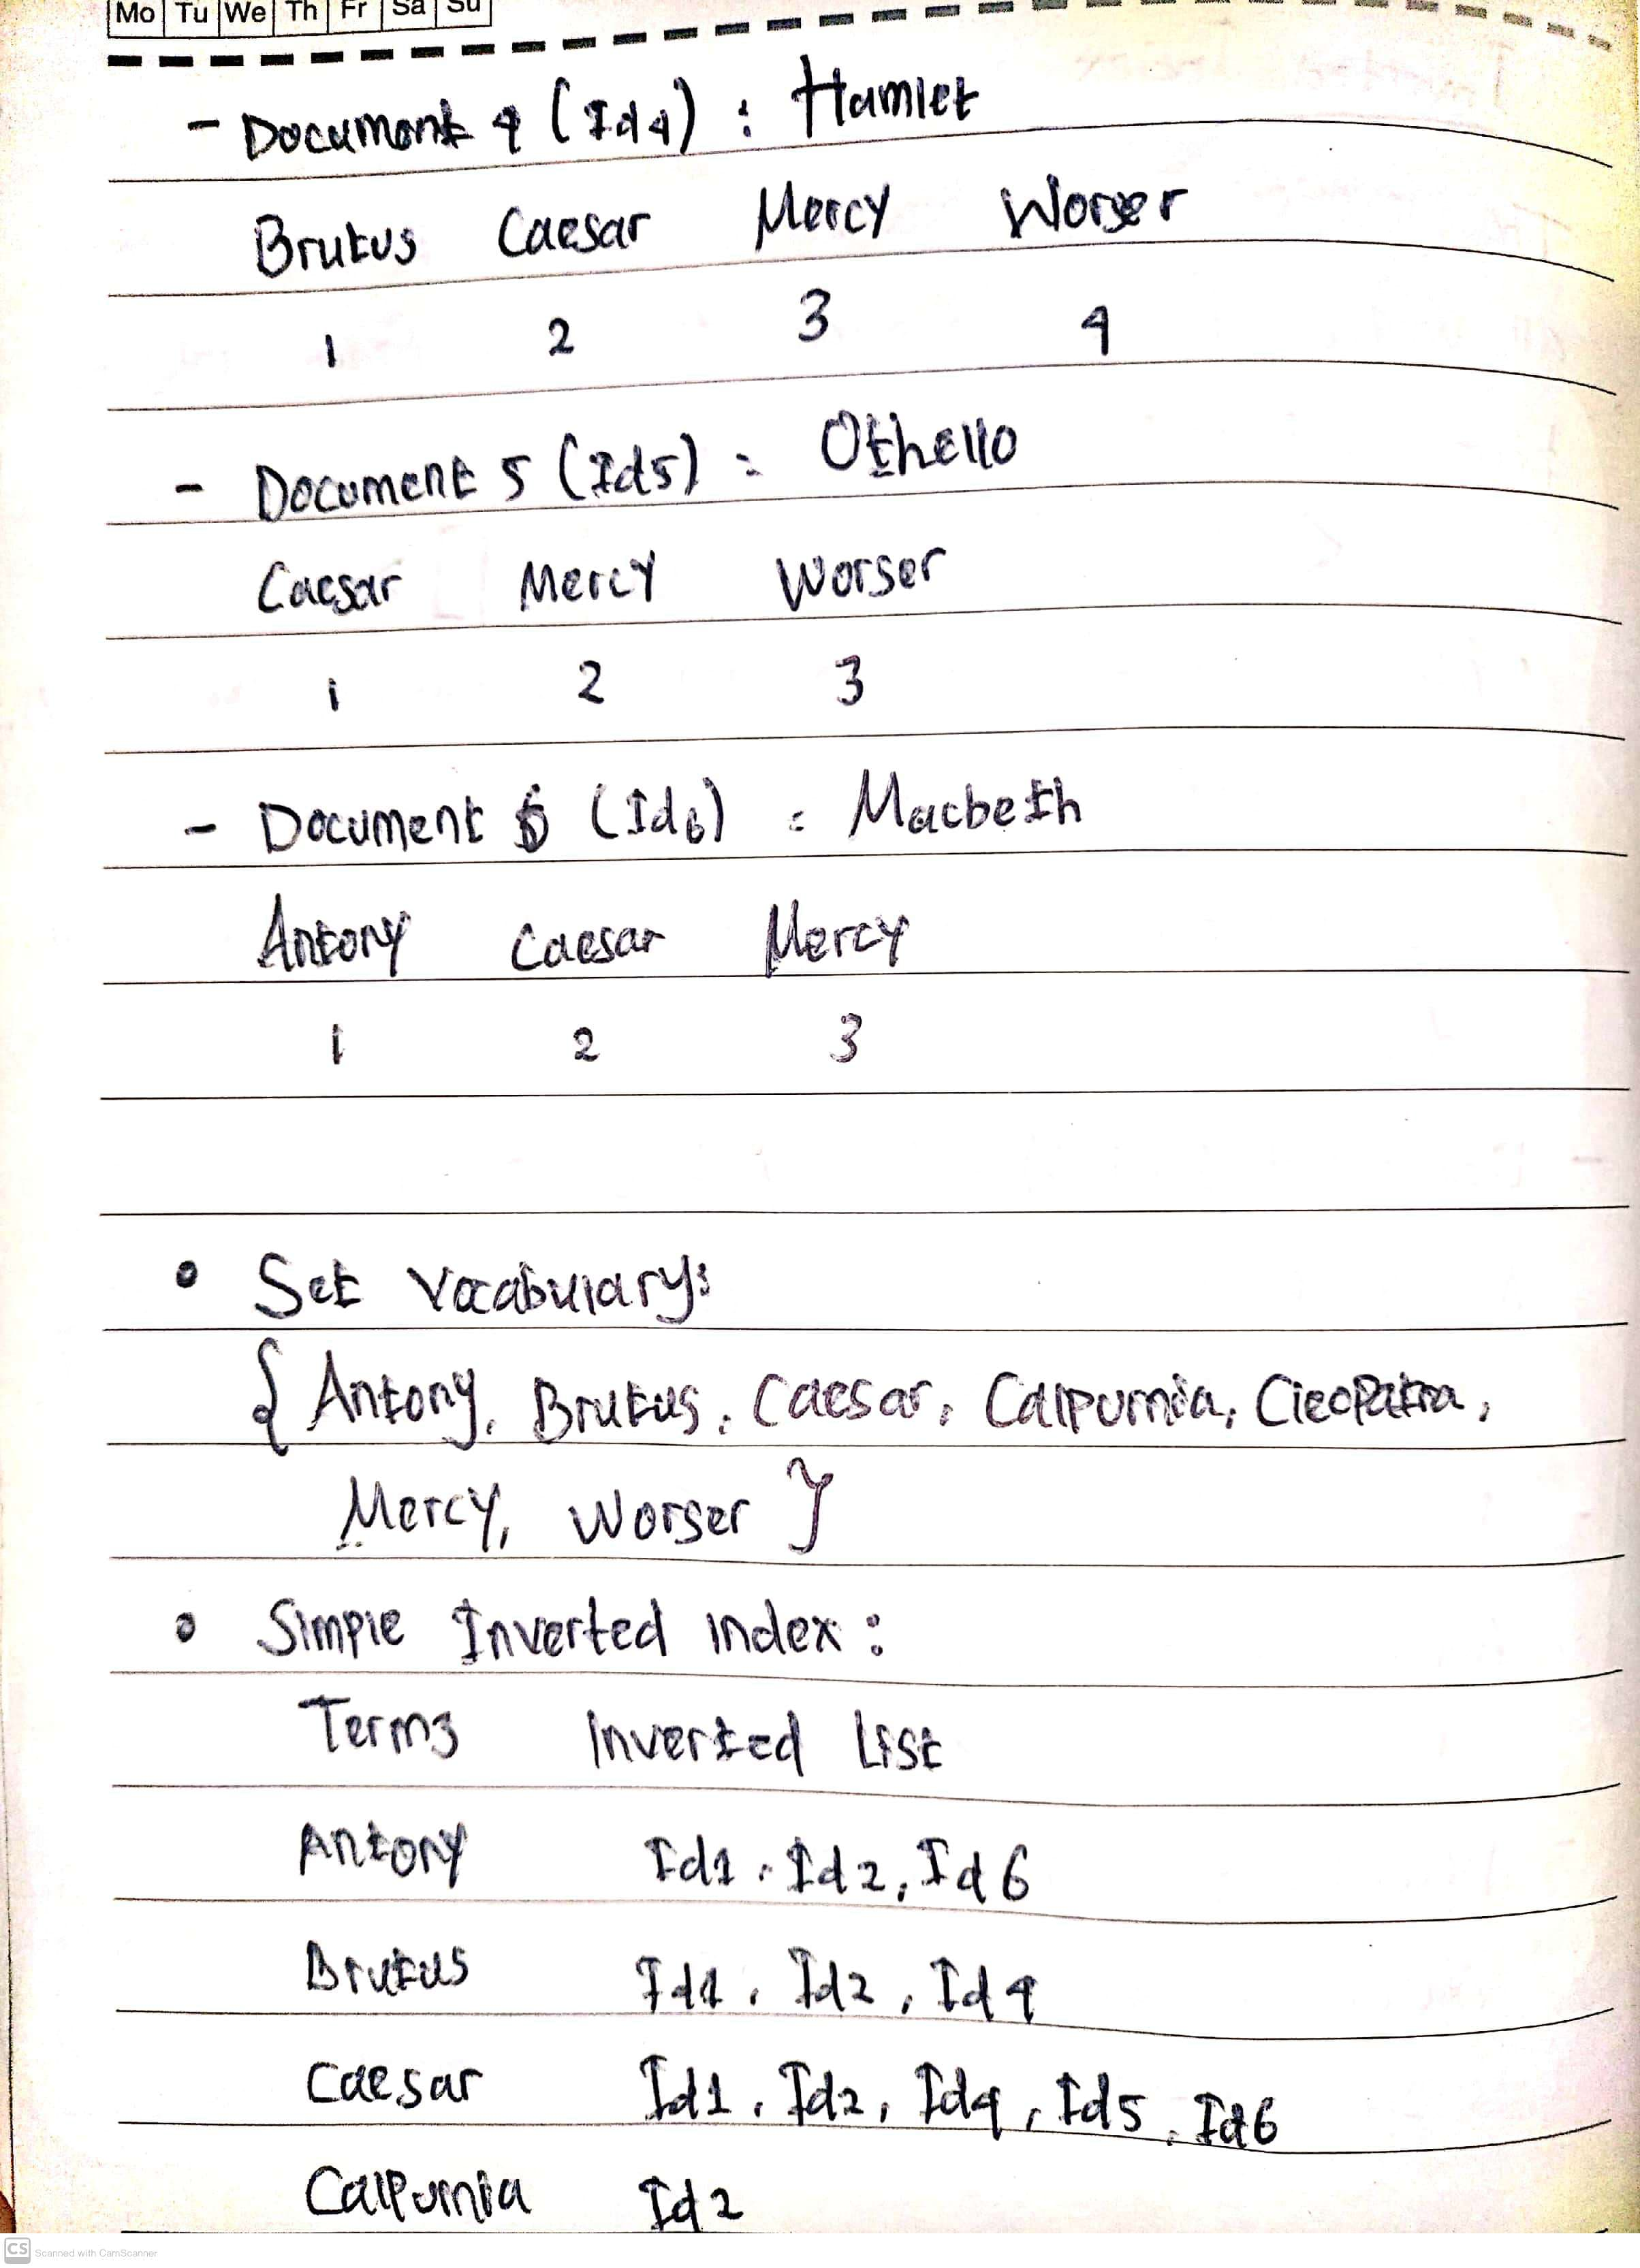

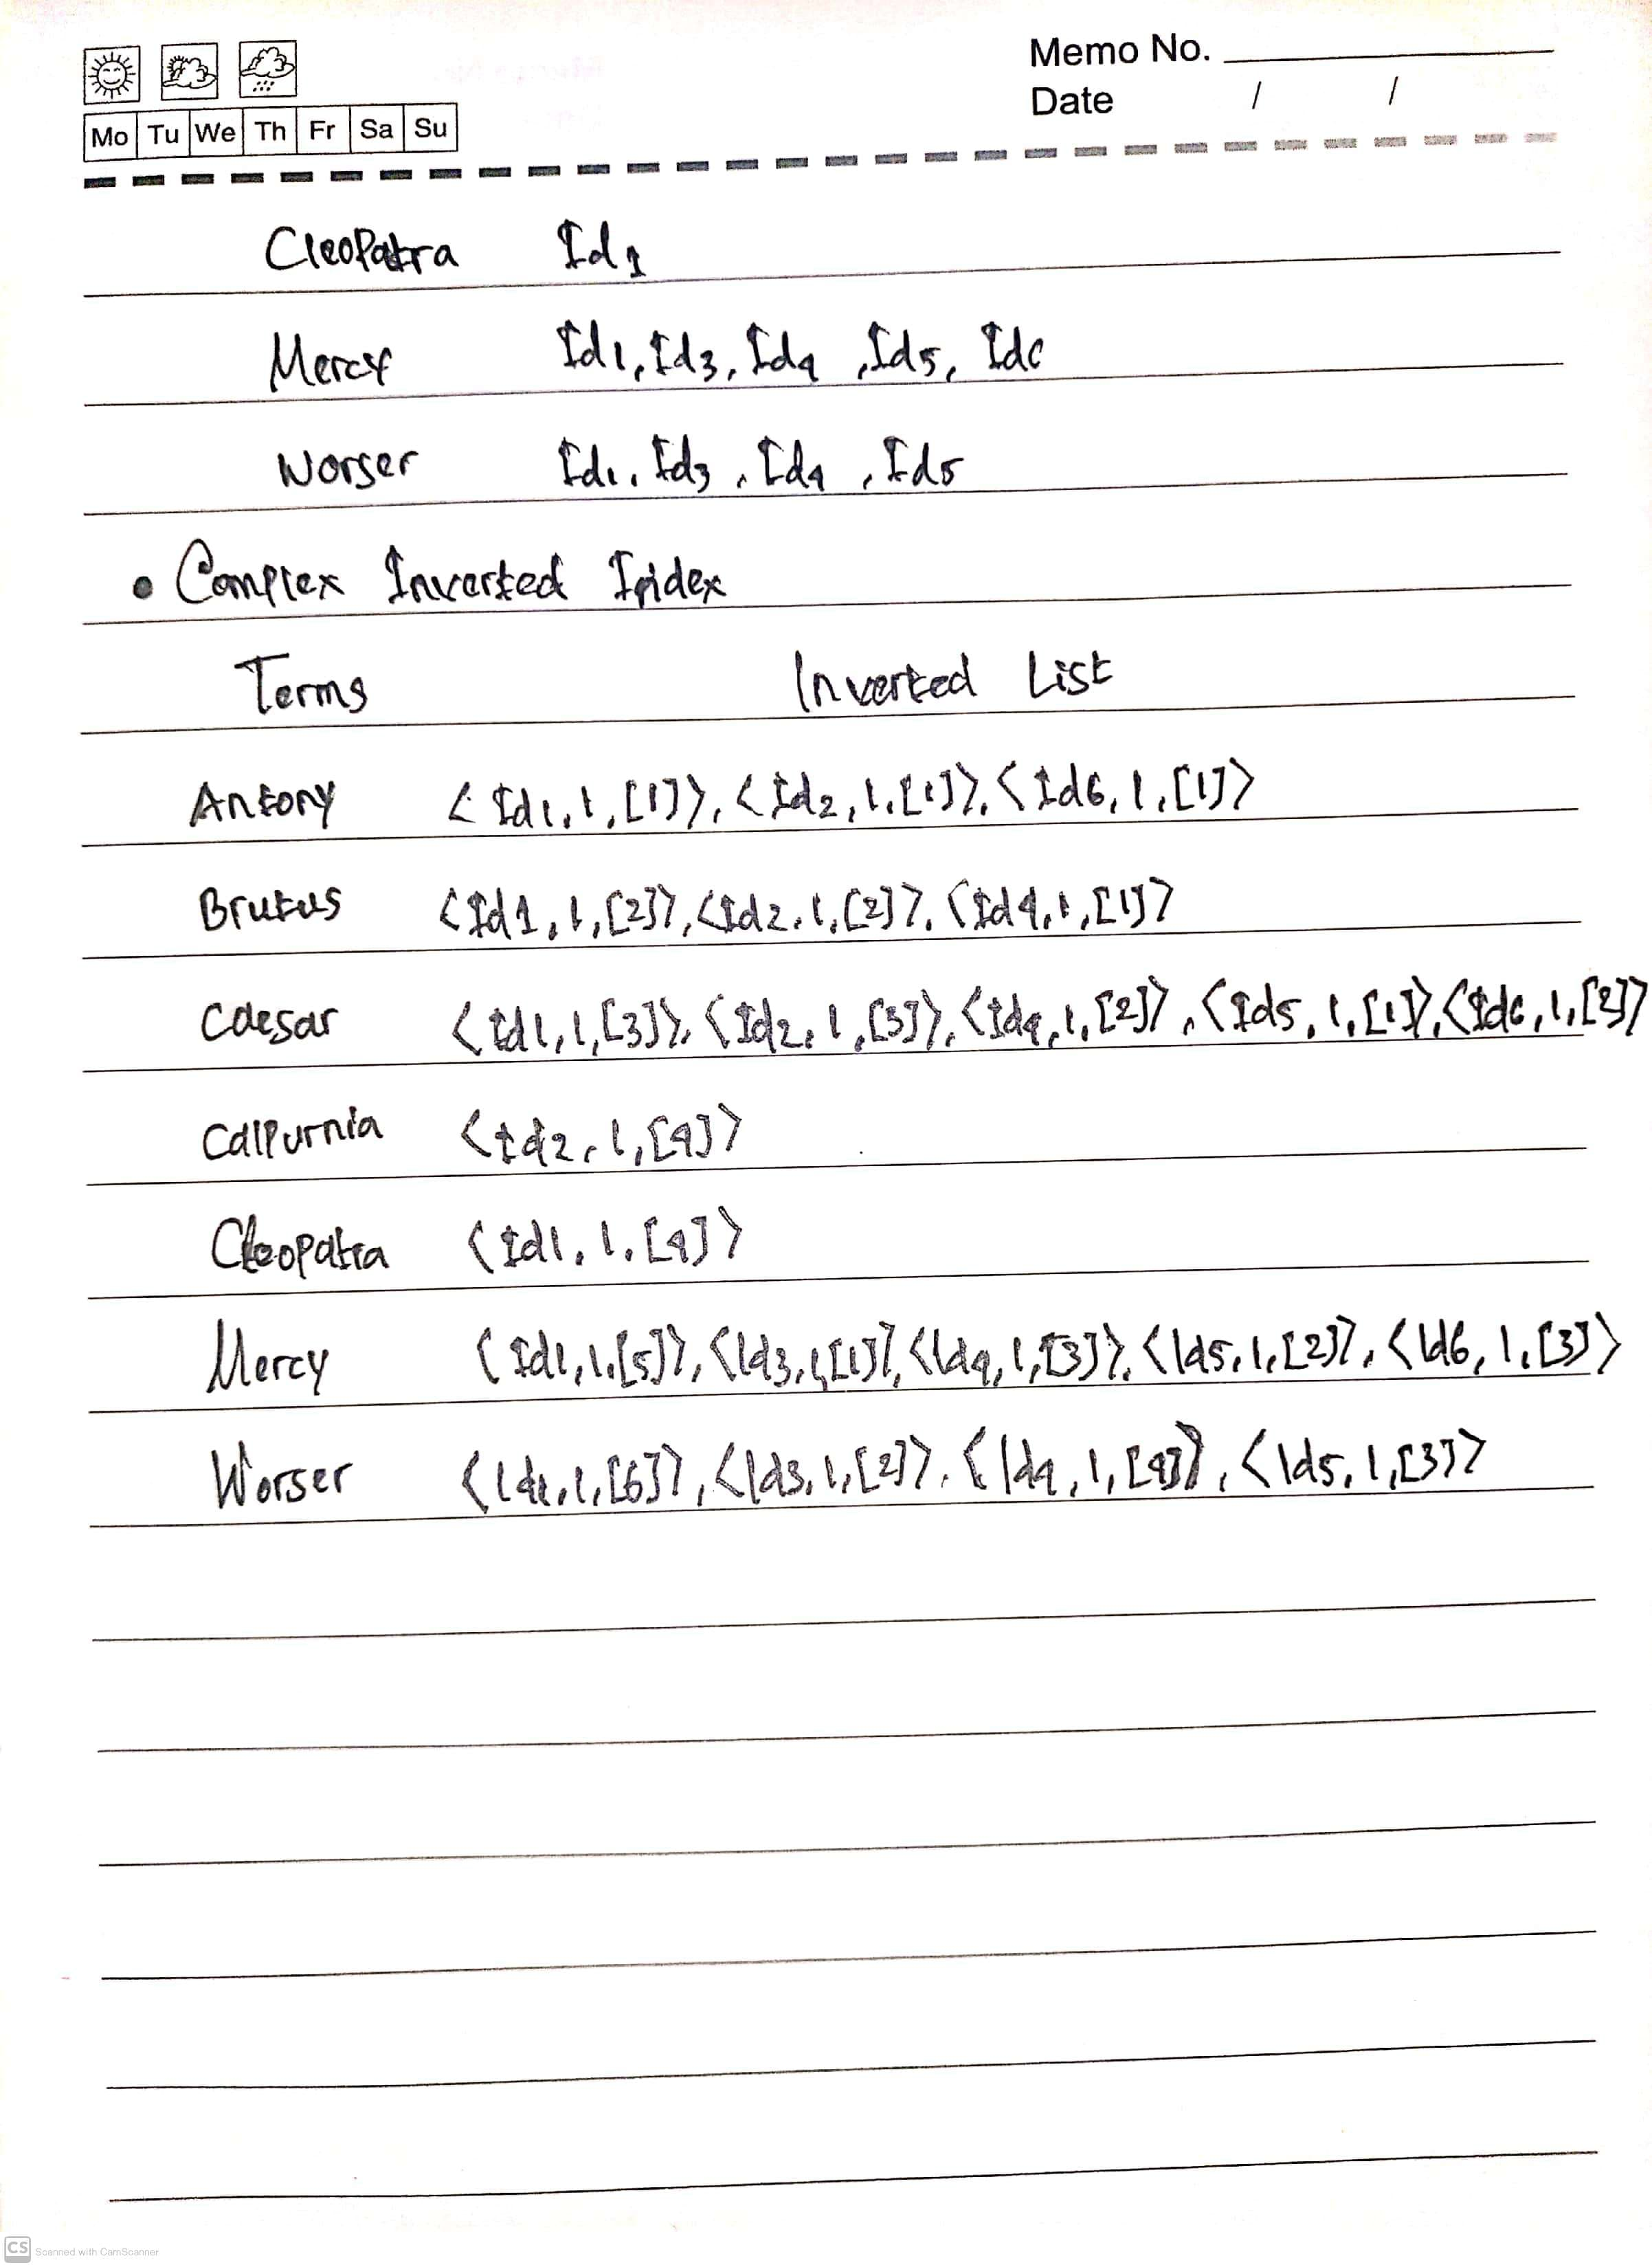

## Python calculation

In [ ]:
# Define the dataset
documents = {
    "Id1": {"terms": ["Antony", "Brutus", "Caesar", "Cleopatra", "Mercy", "Worser"], "positions": [1, 2, 3, 4, 5, 6]},
    "Id2": {"terms": ["Antony", "Brutus", "Caesar", "Calpurnia"], "positions": [1, 2, 3, 4]},
    "Id3": {"terms": ["Mercy", "Worser"], "positions": [1, 2]},
    "Id4": {"terms": ["Brutus", "Caesar", "Mercy", "Worser"], "positions": [1, 2, 3, 4]},
    "Id5": {"terms": ["Caesar", "Mercy", "Worser"], "positions": [1, 2, 3]},
    "Id6": {"terms": ["Antony", "Caesar", "Mercy"], "positions": [1, 2, 3]}
}

In [ ]:
inverted_index = {}
for doc_id, data in documents.items():
    for term, position in zip(data["terms"], data["positions"]):
        if term not in inverted_index:
            inverted_index[term] = {}
        if doc_id not in inverted_index[term]:
            inverted_index[term][doc_id] = []
        inverted_index[term][doc_id].append(position)

In [ ]:
formatted_index = {}
for term, postings in inverted_index.items():
    formatted_index[term] = [f"⟨{doc}, {len(positions)}, {positions}⟩" for doc, positions in postings.items()]

In [ ]:
# Display the complex inverted index
pd.DataFrame([(term, postings) for term, postings in formatted_index.items()], columns=["Term", "Inverted List"])

,Term,Inverted List
0,Antony,"[⟨Id1, 1, [1]⟩, ⟨Id2, 1, [1]⟩, ⟨Id6, 1, [1]⟩]"
1,Brutus,"[⟨Id1, 1, [2]⟩, ⟨Id2, 1, [2]⟩, ⟨Id4, 1, [1]⟩]"
2,Caesar,"[⟨Id1, 1, [3]⟩, ⟨Id2, 1, [3]⟩, ⟨Id4, 1, [2]⟩, ..."
3,Cleopatra,"[⟨Id1, 1, [4]⟩]"
4,Mercy,"[⟨Id1, 1, [5]⟩, ⟨Id3, 1, [1]⟩, ⟨Id4, 1, [3]⟩, ..."
5,Worser,"[⟨Id1, 1, [6]⟩, ⟨Id3, 1, [2]⟩, ⟨Id4, 1, [4]⟩, ..."
6,Calpurnia,"[⟨Id2, 1, [4]⟩]"


In [ ]:
# Search Functionality*
def search_term(term):
    if term in inverted_index:
        return [f"⟨{doc}, {len(positions)}, {positions}⟩" for doc, positions in inverted_index[term].items()]
    else:
        return "Term not found in any document."

In [ ]:
# Interactive search
search_input = input("Enter a term to search: ")
search_result = search_term(search_input)
''' Example output
Enter a term to search: Calpurnia
Search results for 'Calpurnia': ['⟨Id2, 1, [4]⟩']
'''
print(f"Search results for '{search_input}':", search_result)

Enter a term to search: Calpurnia
Search results for 'Calpurnia': ['⟨Id2, 1, [4]⟩']
